# Parallel Programming

So far we have discussed how to make programs faster by *optimizing* them. But there is an even simpler solution to making things run faster: simply run them on a faster computer! While this suggestion is made half in jest, there is  no doubt that the computational power of computer hardware has grown exponentially over the last 30 years, and these new, faster computers allow us to do computations that were impossible to even conceive of in the past.

Today, for reasons we will explain shortly, running large computations require splitting the computations up into many small computations that can be carried out in parallel on a large network of computers. This process is known as *parallel computing*. With the advent of powerful [supercomputers](https://en.wikipedia.org/wiki/Supercomputer), parallel computing is vital, because a supercomputer is really only a large number of individual computers coupled together. Uploading a script you have written to a supercomputer and running it there probably won't make it run much faster, because your script isn't ready to be run in parallel. To get access to the speed and power of a supercomputer, you would need to do *parallel programming*.

While we won't have time to teach you too much parallel programming in this course, we will try to give you a sense of the importance and an appreciation of some of the possibilities. We will also show you some small tools you can use to improve your Python and C++ programs using parallelization without it being too much of a hazel.


## Moore's Law

Moore's law is the name given to a statement by Gordon Moore in a 1965 paper, that observed that the number of transistors on dense integrated chips like a computer central processing unit (CPU) seemed to be doubling each every second year.

The CPU is the brain of the computer and the unit that performs most of the computations underlying our programs. It is built up of transistors that form logic gates. As the number of transistors in a CPU grow, the computational capacity of the CPU grows and we get more powerful and faster machines. While Moore's law specifically talks about the number of transistors on chips, it is often quoted as referring to computational capacity.

Moore predicted that this trend would continue for at least 10 years. His prediction came true, and in 1975 he revised his estimate, saying it would continue to until at least 2000. The trend held true to almost 2012, and has started to slow a bit, now doubling every 2.5 or 3 years. Moore said in 2015 that he thought the trend would reach saturation, saying: "I see Moore's law dying here in the next decade."

```{figure} ../../figures/transistor_count_over_time.png
---
width: 800px
name: ../../figures/transistor_count_over_time.png
alt: ../../figures/transistor_count_over_time.png
---
Moore's law states that the number of transistors in a dense integrated chip, such as a computer CPU, doubles roughly every second year. This Figure shows the transistor count of representative CPUs over the years from 1970 to today. Note the logarithmic y-axis, indicating exponential growth.
```


```{figure} ../../figures/transistors_log.png
---
width: 400px
name: transistors_log
alt: transistors_log
---
The average transistor count of CPU's over time shows a straight line when plotted in a logarithmic plot, indicating that the law holds up well.
```

```{figure} ../../figures/transistors_linear.png
---
width: 400px
name: transistors_linear
alt: transistors_linear
---
A straight line in a logarithmic plot is an exponential curve. This becomes readily apparent when plotting out the same data as in Figure 2 in a linear plot.
```

(the abo../../figures/ are taken from [OurWorldinData.org](https://ourworldindata.org/technological-progress) and used under a [CC BY-SA 4.0](https://creativecommons.org/licenses/by-sa/4.0/deed.en_US) license.)


The exponential growth seen in Moore's law means we have seen an incredible growth in computational capacity in the last 50 years.


## Frequency Scaling

In addition to the transistor count, the *clock rate* of a CPU is important. To run a program, a computer needs to finish a set of instructions or computations. The faster the rate it does those computations, the faster the program finishes. This can be written out as

$${\displaystyle \mathrm {Runtime} ={\frac {\mathrm {Instructions} }{\mathrm {Program} }}\times {\frac {\mathrm {Cycles} }{\mathrm {Instruction} }}\times {\frac {\mathrm {Time} }{\mathrm {Cycle} }},}$$

Here, the final fraction, the time per cycle, is just the inverse of the frequency:

$${\displaystyle \mathrm {Runtime} ={\frac {\mathrm {Instructions} }{\mathrm {Program} }}\times {\frac {\mathrm {Cycles} }{\mathrm {Instruction} }}\times {\frac {\mathrm {1} }{\mathrm {Frequency} }},}$$

By improving the *frequency* of the CPU, we therefore reduce the runtime of the program.

Making CPUs faster by increasing their frequency is known as *frequency scaling* and hardware manufacturers worked hard to increase their CPU frequencies at a dramatic rate from the 1970s into the 2000s.The first personal computer, the Altair 8800 had a clock speed of about 2 MHz. The first CPU to reach 1 GHz was the AMD Athlon in 1999, and in 2002 a Intel Pentium 4 was the first to reach 3 Ghz.

The importance of CPU frequency also lead to what is commonly referred to as the *Megahertz myth*. Because a higher frequency means a lower run-time, it became common to use the frequency of a CPU as a marker of it's performance. The reason this is referred to as a "myth" is because the clock rate is only one indicator of it's performance, and the clock rates of two CPUs can only be compared if all others things are equal.  However, because the frequency gave such a succinct number, it was heavily pushed in marketing, even by the hardware producers themselves.

The era of *frequency scaling* ended in 2004. Before this, Intel had outlined their goals to get to 10 and 20 GHz processors in the near future, but in 2004 these plans were officially cancelled. The reason is that while frequency gives higher speeds, it also increases the *power consumption* of a CPU. A CPU consumes power at a rate of
$${\displaystyle P = C\times V^{2}\times F,}$$

where $P$ is power consumption, $C$ is the capacitance being switched per clock cycle, $V$ is voltage, and $F$ is the processor frequency. Any power consumed by the CPU will be converted to heat, and will lead to overheating if it isn't removed from the system.

Traditionally CPUs are cooled by a metal *heat sink* connected to a fan or liquid cooling system. What hardware producers were seeing was that if they desired to increase the frequencies of processors even more then would need to radically change how CPUs were cooled. It simply isn't physically possible to ramp much higher on the current designs.


## The emergence of multi-core processors

So over at least the last 40 years, processors have gotten exponentially more powerful due to higher transistor counts (Moore's law) and due to frequency scaling. In 2004, frequency scaling of processors more or less stopped, but Moore's law is still going strong, although it is starting to slow down a bit and is expected to end in the last decade or so.

Due to frequency scaling dying, there has been a paradigm shift away from focusing on higher and higher frequencies in processors, to having *multiple cores*. Put simply, modern CPU's consist of several, distinct, CPU's on the same chip.

The figure below shows the historical trend of machine CPU's (and GPU's as well). The orange markers for the transistors are going in a straight line. This is a logarithmic plot, so the growth is exponential. This trend has not slowed down considerably yet. What has flattened out and plateaued is the processor frequency, shown in green. This has also flattened out the power consumption and almost the "single thread" performance. The number of cores in a CPU is on the rise however.

```{figure} ../../figures/trend_data.png
---
width: 700px
name: trend_data
alt: trend_data
---
Image created by [Karl Rupp](https://www.karlrupp.net/2018/02/42-years-of-microprocessor-trend-data)
```

What this means is that while single processors have gotten exponentially more powerful over the last 40 years, this trend is stopping. The increased performance we see out of new hardware emerging now is due to having multiple cores. This means, if we want to capitalize on new, faster hardware, we need to effectively use multiple CPU's.


## Sequential vs Parallel programs

Normal code you are used to write, be it in Python or C++, is *sequential*. This means that all the statements you write occur after each other, one by one. This is the way we are used to write and think about programs, and there is an inherent logic to the *order* of the statements. In some cases a few lines can be swapped around without changing the behavior of the code, but this is definitely not true in general.

Because of this, when we run a normal C++ or Python program, our computer will only ever use a *single* core to run the program. We say that the program is sequential, or *serial*. The operating system of your computer might swap which core it uses to run the program, and if there are many jobs running, the program might be put on halt, and then restart later. But it will still only be tackled by a single core, running instruction after instruction.

If we want to have multiple cores running our code, we need to write our code in a fundamentally different way to create a *parallel* program where the problem itself can be split among different cores, or "workers". Writing parallel code is a big topic that we don't have time to tackle properly, but we will briefly discuss some issues and show some simple examples of how we can parallelize C++ and Python code.

## A real parallel problem

In 2016 the world champion in chess, Magnus Carlsen played against 70 opponents simultaneously in Hamburg. We can imagine that we have been told to write a computer program that will instruct Magnus on how he should play in order to finish within the least amount of time. Suppose the following

* Magnus uses 10 seconds to make a move
* His opponents uses 50 seconds to make a move
* In an average game there are 30 moves

```{figure} ../../figures/magnus_carlsen.jpg
---
width: 400px
name: ../../figures/magnus_carlsen.jpg
alt: ../../figures/magnus_carlsen.jpg
---
**Source:** [chessbase.com](https://en.chessbase.com/post/carlsen-s-70-board-simul-in-hamburg/)
```

We will now go through different solution strategies which illustrates different ways parallelism.


### The sequential program

Before you took this course you didn't know anything about the parallel programming, and there you wrote a sequential program, where Magnus plays against one opponent at the time and when the game is over he moves to the next opponent. In this case Magnus would use $(10 + 50)$ seconds $\times $ $30$ moves $\times$ $70$ opponents $= 126000 $ seconds = $35$ hours.

### Don't wait
Of course, Magnus Carlsen didn't spend 35 hours on this game. The way Magnus Carlsen would play is as follows: He goes to the first opponent, use 10 seconds to make his move and goes directly to the next opponent. After making a move against all the 70 opponents there is $10 \times 70 = 700$ seconds $=$ $11.67$ minutes since he started at the first opponents. The first opponent only used 50 seconds to make his/her move so Magnus doesn't need to wait and can therefore continue in the same manner. In total he would now spend $10$ seconds $\times $ $70$ opponents $\times$  $30$ moves  $= 21000 $ seconds = $5$ hours and $50$ minutes.

### Created copies of Magnus
Now say that you want utilize all the processors you have on your computer to solve this problem, and imagine that we have a 7 core machine available. This would be analogous to make 7 copies of Magnus Carlsen, each running the sequential program. Now we can distribute 10 opponents to each copy and therefore solve the problem in $\frac{35}{7} = 5$ hours.

### The multi-core + multi-threaded approach
At this point you might realize that by combining the multi-threaded and multi-core approach we could event go faster. In fact, by running each core multithreaded Magnus can finish all the 70 games in only $50$ minutes.

## I/O Bounded vs CPU bounded problems

Depending of the type of problem you want to solve you might want to apply different techniques to speed up your program. In the example with Magnus Carlsen playing against multiple opponents, there are two ways we can reduce the total time

1. Use the time that Magnus has to wait for the opponent to move, to do other work
2. Create copies of Magnus that does the same work


### Multithreading - Don't wait
The first approach would be analogous to run a the program across 70 threads. At any time, there is only one process (i.e Magnus Carlsen), but as soon as he has to wait for an opponent, another thread takes over. These types of problems are I/O-bounded problems. I/O bounded problems are problems where you spend a lot of time waiting for input / output (I/O) from some external source that is slower than the CPU. Examples of this is when you want to download content from the web or if you want to write a file.

Note that if the opponents playing against Magnus would make their move instantaneously, we would not gain any speedup by running Magnus along multiple threads.

Technically speaking, a multi-threaded program is not a parallel program, since it is not running multiple things at the same time. Instead the operating system determines which task are performed when, so that the program spend the least amount of time waiting. Notice that it is the operating system that decides which thread is being run.


### Multiprocessing - Make copies
The other approach would be analogous to run the program on multiple cores. Here we make copies of Magnus, with each copy representing one processor executing the work independent on the other processors. This is the only time Magnus is playing in parallel.

The example with Magnus Carlsen playing chess is an example where the tasks (i.e the chess games) are completely independent. However, in scientific computing one would often like to exploit multiprocessing also where there are some dependence across the cores. For example, when solving equations on a large domain, one approach is to split the domain into smaller subdomains and then solve the equation on each subdomain on a separate core. In Figure 4 we show an example with a heart geometry that has been partitioned into 6 subdomains.

```{figure} ../../figures/parallel_mesh.png
---
width: 400px
name: parallel_mesh
alt: parallel_mesh
---
A heart geometry partitioned into 6 subdomains to exploit parallelism
```

Introducing multiprocessing with dependencies across cores, requires additional communication between the cores using a [Message Passing Interface (MPI)](https://en.wikipedia.org/wiki/Message_Passing_Interface). This is beyond the scope of this course, but this is covered in e.g [IN3200](https://www.uio.no/studier/emner/matnat/ifi/IN3200/index-eng.html).


### Example: Checking if numbers are prime
Say that we have a list numbers that we want to check which of them are prime. Since each number is completely independent of the others, the problem is perfect for parallel execution

In [1]:
import concurrent.futures
import os

PRIMES = (
    13466917,
    20996011,
    24036583,
    25964951,
)

def is_prime(n):
    if n % 2 == 0:
        return False
    for i in range(3, n):
        if n % i == 0:
            return False
    return True

In serial we would simply loop over all the prime numbers and call the function `is_prime` on each element in the list.

In [2]:
import time

t0 = time.time()
for number in PRIMES:
    prime = is_prime(number)
    print(f'{number} is prime: {prime}')
t1 = time.time()
print(f'Elapsed time: {t1 - t0}')

13466917 is prime: True


20996011 is prime: True


24036583 is prime: True


25964951 is prime: True
Elapsed time: 4.766899585723877


### Parallelizing the `for` loop
One thing to notice is that when we loop over the list of primes, the code that is executed at every iterations is the same, i.e the function `is_prime`. The only thing that is changing is the input to that function.

If you have a loop where the code that is executed in each iteration can be refactored into a separate function and the only thing that is changing is the input, chances are high that the for loop can be parallelized.

### The `map` function
When you are in a situation where you have a for loop and everything inside the loop can be refactored out to a function, there is another function called `map` which be used instead of the loop. `map` takes a function as the first argument, and a list with arguments to the function as the second argument and applies the function to each element in the list.

The `map` function is central in many functional programming languages such as [Haskell](https://www.haskell.org), where loops does not exists.

In [3]:
t0 = time.time()
prime = map(is_prime, PRIMES)
print('\n'.join([f"{number} is prime: {p}" for number, p, in zip(PRIMES, prime)]))
t1 = time.time()
print(f'\nElapsed time: {t1 - t0}')

13466917 is prime: True
20996011 is prime: True
24036583 is prime: True
25964951 is prime: True

Elapsed time: 5.0602569580078125


We will use a parallel version the `map` function to run this code in parallel. This `map` function is an instance-method on object from a module called `concurrent.futures`.

In [4]:
# Hack to make it run in the notebook
from textwrap import dedent
with open("is_prime.py", "w") as f:
    f.write(dedent("""
    def is_prime(n):
        if n % 2 == 0:
            return False
        for i in range(3, n):
            if n % i == 0:
                return False
        return True"""))

In [5]:
from is_prime import is_prime
t0 = time.time()

with concurrent.futures.ProcessPoolExecutor() as executor:
    for number, prime in zip(PRIMES, executor.map(is_prime, PRIMES)):
        print(f'{number} is prime: {prime}')
t1 = time.time()
print(f'\nElapsed time: {t1 - t0}')

13466917 is prime: True


20996011 is prime: True


24036583 is prime: True


25964951 is prime: True

Elapsed time: 2.9615085124969482


As we can see, the code ran about 3-4 times faster in parallel. Since some primes are faster to check for primality it is difficult to distribute the work equally across the different processes.

The nice thing about the `concurrent.futures` module is that the API for the multiprocessing and threading is very similar. If we want use threading in stead of multiprocessing the only thing we need to do in this case is to use a change `ProcessPoolExecutor` with `ThreadPoolExecutor`.

In [6]:
t0 = time.time()
with concurrent.futures.ThreadPoolExecutor() as executor:
    for number, prime in zip(PRIMES, executor.map(is_prime, PRIMES)):
        print(f'{number} is prime: {prime}')
t1 = time.time()
print(f'\nElapsed time: {t1 - t0}')

13466917 is prime: True


20996011 is prime: True
24036583 is prime: True
25964951 is prime: True

Elapsed time: 5.0292980670928955


Since this is a CPU-bounded problem we will not gain any speedup by using more threads, which is evident when we look at the elapsed time. We will not cover any examples of I/O bounded problems, but the if you are interested in learning more you can check out the article [Speed Up Your Python Program With Concurrency](https://realpython.com/python-concurrency/).

Another possible optimization to this code would be to use `numba`, which would give an even greater speedup. However, the speedup here mainly comes from the just-in-time (jit) compilation which basically turns the python loops into C-loops.

In [7]:
import numba

@numba.jit()
def is_prime_numba(n):
    prime = True
    if n % 2 == 0:
        prime = False

    for i in range(3, n):
        if n % i == 0:
            prime = False
    return prime

@numba.jit(parallel=True)
def fun(primes):
    for i in numba.prange(len(primes)):
        number = primes[i]
        prime = is_prime_numba(number)
        #print(f'{number} is prime: {prime}')

t0 = time.time()
fun(PRIMES)
t1 = time.time()
print(f'Elapsed time: {t1 - t0}')

Elapsed time: 0.9140415191650391


### Parallel problems

As mentioned before, parallelizing problems can be tricky, because in many algorithms, there is an inherent order in which operations must be carried out for things to make sense. Because of this, some problems simply cannot be parallelized, because the problem itself is inherently sequential. An example of this is solving an ODE system like the one we did in Project 1. Because we solve the ODEs by stepping one step forward in time, it is hard to split the job among different workers, because they would just have to end up waiting for each other.

In other cases, a problem is *perfectly parallelizable*, because the problem itself consists of many small tasks that basically have little or nothing to do with each other. Such problems are often called [*embarrassingly parallel*](https://en.wikipedia.org/wiki/Embarrassingly_parallel). Testing numbers for primality is a good example of such a problem. Another example is rendering computer animations, because each frame in an animation can be rendered independently of each other, and each pixel in a frame can also be rendered individually.

Most problems are somewhere in between completely these two extremes. Often they have some setup that is purely sequential, and then some part of the problem which can easily be split up, and then some serial part again. When writing code that is parallel, it is important to understand which parts of the code should be carried out in parallel, and which parts are serial. That way, the code progresses serially, until it reaches a parallel section, here it "splits" up into different "threads" that can be given to different processor cores. After the parallel section, these threads merge back together into the "master thread" and the program continues serially.

Writing out the process of splitting up into threads and merging them together manually can be a hazel and take some time to learn. Luckily, there are tools to automate this process. You have now seen the [concurrent.futures module](https://docs.python.org/3/library/concurrent.futures.html) which is that standard way of running multiple threads and processors in python.

In python you also have other packages such as [numba](https://numba.pydata.org/) and [Cython](https://cython.readthedocs.io/en/latest/), and if you want to run really large scale program then [dask](https://dask.org) is a good solution.

For C and C++, the most popular and important tool is called [OpenMP](https://www.openmp.org/). OpenMP is a tool that allows us to compile C and C++ programs with automatic branching into threads with parallel execution. The only thing we really need to do is indicate what parts of the code it should try to run in parallel. We can also use OpenMP on our JIT-compiled Python code through Cython/numba.

### Downsides of Parallel Programming

Just like optimization, parallelizing code has certain downsides and should be thought of as an investment. For one thing parallel problems usually take longer to tackle, and so will take time to implement. More important however, is that parallel problems can be tricker to understand than sequential programs, and so there is also the added downside of less readable and maintainable code.

When parallelizing code, the goal is to divide the work over multiple cores. If we divide a job over $n$ cores, we would ideally hope to divide the runtime by $n$, i.e., give us a speed up of $n$. If we divide a job over 2 cores, we would hope to halve the running time. This is the ideal case, but will not be realistic in practice. The reason is that there will *always* be some *overhead* when parallelizing. This "overhead" is the extra logistical work the computer needs to use to actually split up the work among several processes and to keep communication between different workers to make sure they are solving the problem correctly.

An analogy often used for overhead is the task of *painting a house*. If a single person paints a huge mansion, it will take a long time. To make it go faster, they can get some friends to help. Painting a house is an example of a perfectly parallelizable job. One person can paint one side of the house, while the other person paints the other side, the task is easy to divvy up. However, even in this case, where the problem itself is easy to split up, there will be some overhead. For one, the two people need to agree on who paints what. They will both need access to equipment. What if there is just one ladder, and they both want to use it at the same time, and so on. Similar problems will arise on a computer.

Due to overhead, dividing a problem over $n$ processes will give a speedup of *at most* $n$, but often slightly less than this. If we are not thinking carefully at how we parallelize our code, trying to split the task among more threads can in some cases actually *slow things down*. Imagine you need to paint a house and try to split this task among 10,000 workers. The job of giving each person a task, and having the needed equipment, and just making sure nobody crashes into each other, is a bigger job than the original task itself!

### Downside with multi-threaded programs - Race Conditions

The major downside to running your code on multiple threads is that it can lead to entirely new bugs. The most important class of bugs associated with multi-threaded programming is *race conditions*. These are bugs that occur because things happen in the wrong order.

Imagine for example we have a fairly simple code trying to increment a variable:
```
x = 0
x = x + 1
x = x + 1
```
When running this code sequentially, the final result should of course be $0+1+1 = 2$. If we try to divide the work over several threads however, the two threads can get in each other's way.

To increment `x` by one, the computer needs to carry out three operations:
1. First read the current value of `x`
2. Increment this value by adding 1
3. Store the result of the computation to `x`

Now say two threads have divided this problem among them, so both threads are trying to increment `x` once each. What happens? Well, it happens in what order the threads try to accomplish their jobs. The figure below summarizes the situation.

```{figure} ../../figures/race_condition.png
---
width: 600px
name: race_condition
alt: race_condition
---
```


In the left table thread 1 finishes its incrementing before thread 2 starts. Thread 2 therefor reads `x` as 1 and increments it to 2, as expected. In the right case however, thread 2 reads `x` before 1 has managed to update it, meaning it reads a 0. After thread 1 finishes updating `x` from 0 to 1, thread 2 does the same! Meaning `x` is 1 at the end of the run.

This kind of a bug is called a "race" condition, because the behavior of the program depends on which thread "wins the race". The operating system decides when we switch from one thread to another, and this  In general we cannot predict which thread will reach a certain part of the code first, so we should program in a way where it does not matter which order threads finish their tasks in. However, this is not always easy, leading to these kinds of bugs.

The annoying part about race conditions is that the behavior of the program can become non-deterministic. Sometimes thread 1 finishes first, and then thread 2, meaning the behavior is correct. But sometimes the reverse happens, revealing the bug. Such non-deterministic bugs can be annoying and difficult to track down, as when one tries to narrow them down, they can stop occurring! These type of bugs are therefore sometimes humorously referred to as [*Heisenbugs*](https://en.wikipedia.org/wiki/Heisenbug).


To illustrate the race conduction we make a fake database and let different threads update the same value. In order to make the race condition happen we will let the program sleep between

In [8]:
import time
import concurrent.futures

class Database:
    def __init__(self, sleep_time=0.1):
        self.value = 0
        self.sleep_time = sleep_time

    def update_value(self, thread_index):
        print(f"Thread {thread_index}: updating value")
        value_copy = self.value
        value_copy += 1
        # Here we sleep so that we are "sure" that we switch thread
        time.sleep(self.sleep_time)
        self.value = value_copy
        print(f"Thread {thread_index}: updating value")


num_threads = 2
data = Database()
print(f"Update value using {num_threads} threads. ")
print(f"Starting value is {data.value}")
with concurrent.futures.ThreadPoolExecutor(max_workers=num_threads) as executor:
    for thread_index in range(num_threads):
        executor.submit(data.update_value, thread_index)
print(f"Update finished. Ending value is {data.value}")

Update value using 2 threads. 
Starting value is 0
Thread 0: updating value
Thread 1: updating value
Thread 0: updating value
Thread 1: updating value
Update finished. Ending value is 1


Now, lets see what happens if we reduce the amount of time we sleep

In [9]:
data = Database(sleep_time=0.00001)
print(f"Update value using {num_threads} threads. ")
print(f"Starting value is {data.value}")
with concurrent.futures.ThreadPoolExecutor(max_workers=num_threads) as executor:
    for thread_index in range(num_threads):
        executor.submit(data.update_value, thread_index)
print(f"Update finished. Ending value is {data.value}")

Update value using 2 threads. 
Starting value is 0
Thread 0: updating value
Thread 1: updating value
Thread 1: updating value
Thread 0: updating value
Update finished. Ending value is 1


In this case, the time for waiting was so low that my operating system decided to wait instead of switching thread.

Note that race conditions happens because the two threads are sharing the same variable. This would not happen if we try to run this using a process pool. Why?


While we won't spend too much time focusing on how to parallelize code itself in this course, let us look at at least one example. We will first cover the problem itself, and then start to optimize it, finally we turn to parallelization.


## Example: The Mandelbrot Set

The [Mandelbrot set](https://en.wikipedia.org/wiki/Mandelbrot_set) is perhaps one of the worlds most famous fractals. We will use computing an image of the Mandelbrot set as a Benchmark of an optimization problem.

To compute the Mandelbrot set, we start with a number $z = 0$, and then repeatedly iterate this number according to the function

$$f_c(z) = z^2 + c,$$

So if c is 1 for example, we would have
$$z = 0,$$
$$f(0) = 0^2 + 1 = 1,$$
$$f(f(0)) = 1^2 + 1 = 2,$$
$$f(f(f(0))) = 2^2 + 1 = 5,$$

and so on. This point clearly diverges.

The mandelbrot set is defined as *all points* $c$, such that $f_c(z) = z^2 + c$ does not diverges if we start at $z=0$. If $c$ was a real number, this wouldn't be a terribly exciting problem, as the Mandelbrot set would simply be

$$c \in [-2, 0.25]$$

Any smaller or larger than this, and repeated iteration would blow up $z$.

However, the Mandelbrot set is defined as any $c \in \mathcal{C}$, i.e., for any complex number. It turns out that this makes the whole problem a lot more interesting, as it leads to chaotic and fractal behavior at the boundary, meaning we can zoom in "infinitely" and still see a large amount of complexity.

The experiments below are run on and IFI machine through ssh.

### Rendering the Mandelbrot set

The Mandelbrot set is a mathematical set, and finding it is a mathematical challenge. However, if we want to render an image of it, we can simplify it considerably.

To produce an image, we must find the values at each pixel in the image. Any pixel in the image will have coordinates $(x, y)$ in the complex plane, which we will associate with the value $c = x + iy$.

To now compute the image, or *render it* as it is normally called, we must check wether each value $c$ diverges or not. To do so, we simply iterate the function a large number of times. It can be shown that any number that grows larger than $|z| > 2$ will diverge. Any point that does not grow beyond $|z| > 2$ can still diverge, but if we repeatedly iterate for a long time and we have not diverged, we simply assume the function will not diverge. Here we have a parameter in our rendering, the *max number of iterations* to perform before declaring a point as non-divergent.

To render the image, we give any non-divergent point the value 0, and then any other point the number of iterations before the point "escapes" the set, i.e., it grows beyond $|z| > 2$.


#### References

We are now ready to render the Mandelbrot fractal. If this is going a little too fast, you can read the following blogposts for more information and a softer walkthrough:
* [Mandelbrot Set with Python
](https://levelup.gitconnected.com/mandelbrot-set-with-python-983e9fc47f56)

The follow up blogpost is all about optimizing the computation with Python as well as implementation with c/c++:
* [Performance in Mandelbrot Set Computation
](https://martin-ueding.de/posts/mandelbrot-performance/)

In [10]:
import numpy as np
import matplotlib.pyplot as plt

## Naive implementation in Python

Let us start with a naive implementation in Python. We first write a function that checks wether a given complex point $c$ diverges:

In [11]:
import numpy as np

def mandelbrot_pixel(c, maxiter):
    """Check wether a single pixel diverges"""
    z = 0

    for n in range(maxiter):
        z = z*z + c
        if abs(z) > 2:
            return n

    return 0

Here the input $c$ can be a complex number. Python supports a complex type built in.

We start by saying $z=0$, because this is where we start iterating, for any $c$. Then we repeatedly compute $f_c(z) = z^2 + c$ and check if $|z| > 2$. If it is, the point has "escaped", and we return the number of iterations. If we have performed all iterations and the point is still bounded, we return 0.


Next we turn to computing the entire image. We need to specify the number of pixels in either direction (the width and height of the image), as well as the "zoom", i.e., what ranges to focus on.

In [12]:
def mandelbrot_image(xmin, xmax, ymin, ymax, width, height, maxiter):
    """Render an image of the Mandelbrot set"""
    x = np.linspace(xmin, xmax, width)
    y = np.linspace(ymin, ymax, height)
    img = np.empty((width, height))

    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            c = xi + 1j*yj
            img[i, j] = mandelbrot_pixel(c, maxiter)

    return img

Here we first use `np.linspace` to find the values of $x$ and $y$ for each pixel. Then we loop over each pixel in the image and iterate each point $c = x + i\cdot y$. To define a complex value in Python you can write `a + 1j*b`, where `1j` denotes the imaginary unit.


Let us now call and plot out an image to see how it looks. To plot out the entire Mandelbrot, we want to plot out $x\in[-2, 0.5]$ and $y\in[-1.25, 1.25]$.

In [13]:
# This took 12 seconds
img = mandelbrot_image(-2, 0.5, -1.25, 1.25, 1000, 1000, 80)

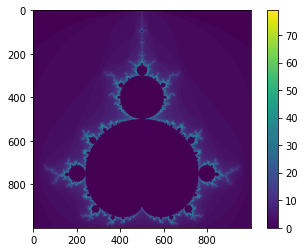

In [14]:
fig, ax = plt.subplots()
im = ax.imshow(img)
fig.colorbar(im)
plt.show()

We can make the plot a little nicer. For one thing, `imshow` uses a different axis convention from math.

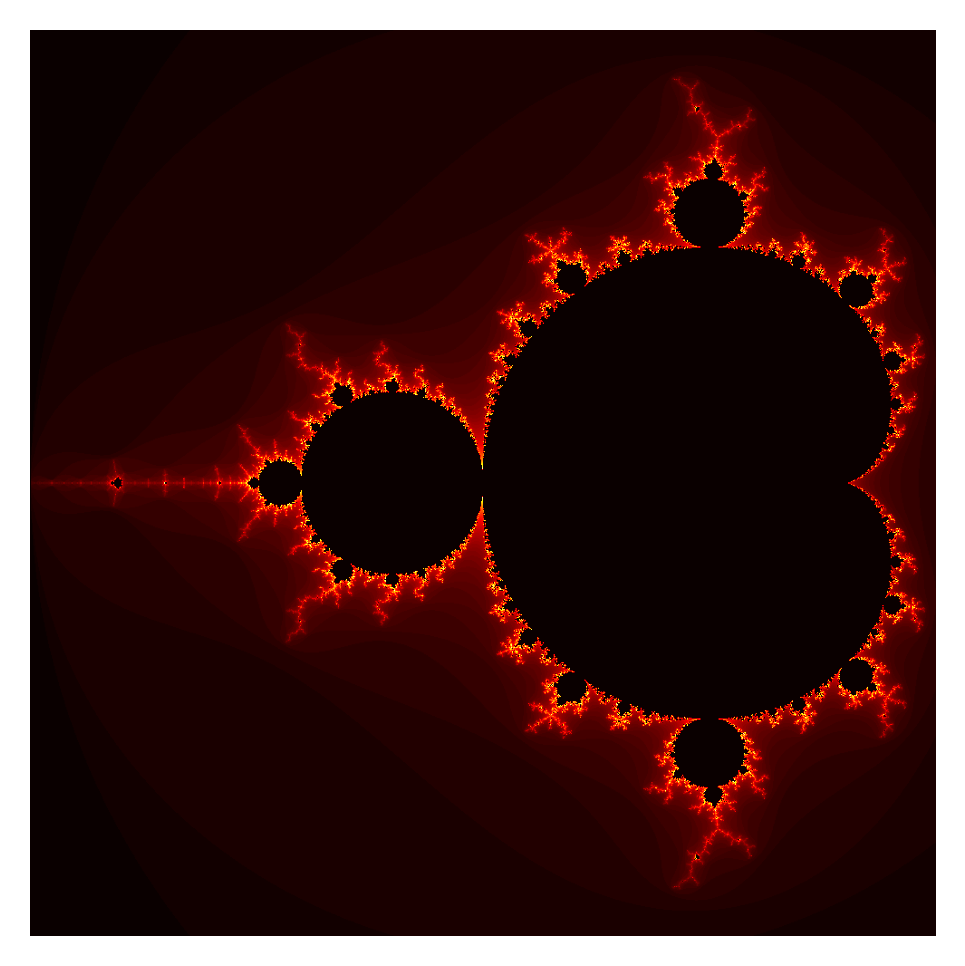

In [15]:
fig, ax = plt.subplots(dpi=300)
ax.imshow(img.T, cmap='hot', origin='lower')
ax.axis('off')
plt.show()

The image can be further improved by rendering a longer *horizon*, but this is unimportant detail at the moment.  For now, we want to optimize and parallelize our code.


### Devising a Benchmark

Now we want to start optimizing our Mandelbrot render. We therefore need to devise a benchmark we can use to time our program as we make changes.

Here, we'll render an image of
$1000\times1000$ pixels, i.e., 1 megapixel, at the coordinates
$$x \in [-0.74877, -0.74872]$$
$$y \in [0.065053, 0.065103]$$
with a maximum of 2048 iterations.

We write our benchmark out as a function, so that we can simply call it when we want to time our program.

In [16]:
def benchmark(mandelbrot):
    xmin = -0.74877
    xmax = -0.74872
    ymin = 0.065053
    ymax = 0.065103
    pixels = 1000
    maxiter = 2048
    return mandelbrot(xmin, xmax, ymin, ymax, pixels, pixels, maxiter)

```

%timeit -n 1 -r 1 benchmark(mandelbrot_image)
```

(This took 3 minutes 36 seconds)


### Multiprocessing

Using the `concurrent.futures` module we can parallelize the outer loop.

In [17]:
# Hack to make it run in the notebook
with open("mandelbrot_mp.py", "w") as f:
    f.write(dedent("""
    def mandelbrot_pixel(c, maxiter):
        z = 0

        for n in range(maxiter):
            z = z*z + c
            if abs(z) > 2:
                return n

        return 0

    def compute(yj, x, maxiter):
        c = [xi + 1j*yj for xi in x]
        return list(map(mandelbrot_pixel, c, [maxiter]*len(c)))"""))

In [18]:
from mandelbrot_mp import compute

def mandelbrot_image_mp(xmin, xmax, ymin, ymax, width, height, maxiter):
    """Render an image of the Mandelbrot set"""
    x = np.linspace(xmin, xmax, width)
    y = np.linspace(ymin, ymax, height)
    img = np.empty((width, height))

    maxiters = [maxiter] * height
    X = [x] * height

    with concurrent.futures.ProcessPoolExecutor() as executor:
        for j, value in enumerate(executor.map(compute, y, X, maxiters)):
                img[:, j] = value

    return img

In [19]:
import psutil
psutil.cpu_count()

2

```

%timeit -n 1 -r 1 benchmark(mandelbrot_image_mp)
```

(This took 9.7 seconds on the IFI machine which have 24 cores)


However, in this case we see a speed up of
$$\frac{206 {\rm\ s}}{9.7 {\rm\ s}} = 21.23$$
which is almost a perfect speed up.


### Vectorized numpy

As we saw last week, one easy way to optimize the code is to use numpy vectorization.

In [20]:
def mandelbrot_numpy(xmin, xmax, ymin, ymax, width, height, maxiter):
    x = np.linspace(xmin, xmax, num=width).reshape((1, width))
    y = np.linspace(ymin, ymax, num=height).reshape((height, 1))
    C = np.tile(x, (height, 1)) + 1j * np.tile(y, (1, width))

    Z = np.zeros((height, width), dtype=complex)
    M = np.ones((height, width), dtype=bool)
    M_tmp = np.ones((height, width), dtype=bool)
    img = np.zeros((height, width), dtype=float)
    for i in range(maxiter):
        Z[M] = Z[M] * Z[M] + C[M]
        M[np.abs(Z) > 2] = False
        M_tmp = ~M & ~M_tmp
        img[~M_tmp] = i
        M_tmp[:] = M[:]

    img[np.where(img == maxiter-1)] = 0
    return img.T

```

%timeit benchmark(mandelbrot_numpy)
```

(This took 34.5 seconds on my laptop)


We see that vectorization is about 6 times as fast as the native python implementation.


### JIT-compiling with Numba

From last weeks lecture, we also learnt that [numba](http://numba.pydata.org/) is a tool that can automatically just-in-time compile code in Python to make it surprisingly fast. Let us try it with out code. We simply add the `numba.jit` decorators to our two function, and make no other changes to them:

In [21]:
import numpy as np
import numba

@numba.jit
def mandelbrot_pixel_numba(c, maxiter):
    z = 0
    for n in range(maxiter):
        z = z*z + c
        if abs(z) > 2:
            return n
    return 0

@numba.jit
def mandelbrot_numba(xmin, xmax, ymin, ymax, width, height, maxiter):
    x = np.linspace(xmin, xmax, width)
    y = np.linspace(ymin, ymax, height)
    img = np.empty((width, height))

    for i in range(width):
        for j in range(height):
            c = x[i] + 1j*y[j]
            img[i, j] = mandelbrot_pixel_numba(c, maxiter)
    return img

```

%timeit benchmark(mandelbrot_numba)
```

(This look 7.34 seconds)


JIT compiling with numba gives a quite amazing speed up. However, let us see if we can't improve the code itself inside the functions a bit as well.

For one thing, starting at $z=0$, we *know* that the first iteration will just give $z=c$. So we might as well start there, with $z=c$ as the first value.

Much more importantly: computing $|z|$ requires first squaring to compute $|z|^2$ and then taking the square root (this happens inside `abs`. This process is expensive, because taking square roots is a costly operation. However, we only do this because we want to check if $|z| > 2$, so we could just as easily check if $|z^2| > 4$.

In addition, it turns out that avoiding the built-in complex type is better for speed, so we instead want to send in the $x$ and $y$ components separately. To iterate, we then have
$$z^2 + c = (x + i\cdot y)^2 + (c_x + y\cdot c_y) = (x^2 - y^2 + c_x) + i\cdot(2xy + c_y).$$

In [22]:
import numpy as np
import numba

@numba.jit
def mandelbrot_pixel_numba(cx, cy, maxiter):
    x = cx
    y = cy
    for n in range(maxiter):
        x2 = x*x
        y2 = y*y
        if x2 + y2 > 4.0:
            return n
        y = 2*x*y + cy
        x = x2 - y2 + cx
    return 0


@numba.jit
def mandelbrot_numba(xmin, xmax, ymin, ymax, width, height, maxiter):
    x = np.linspace(xmin, xmax, width)
    y = np.linspace(ymin, ymax, height)
    img = np.zeros((width, height))

    for i in range(width):
        for j in range(height):
            img[i, j] = mandelbrot_pixel_numba(x[i], y[j], maxiter)
    return img

```

%timeit benchmark(mandelbrot_numba)
```

(This took about 2.91 seconds)


### Plotting out the Benchmark

So far vi have gotten a considerable speed-up by going from a naive solution to JIT compiling with numba. We have gone from 3 minutes 36 seconds, to 7.34 seconds, which was a speed up of
$$\frac{206 {\rm\ s}}{7.34 {\rm\ s}} = 28.1$$

And further optimizing some of our lines reduced this further down to 2.91 seconds. For a total speedup of

$$\frac{206 {\rm\ s}}{2.91 {\rm\ s}} = 70.8$$

We could also have tried optimizing with Cython, but we ignore this for now. You can read about using Cython in the blogpost.

Let us plot out the benchmark image rendered by our final numba variant:

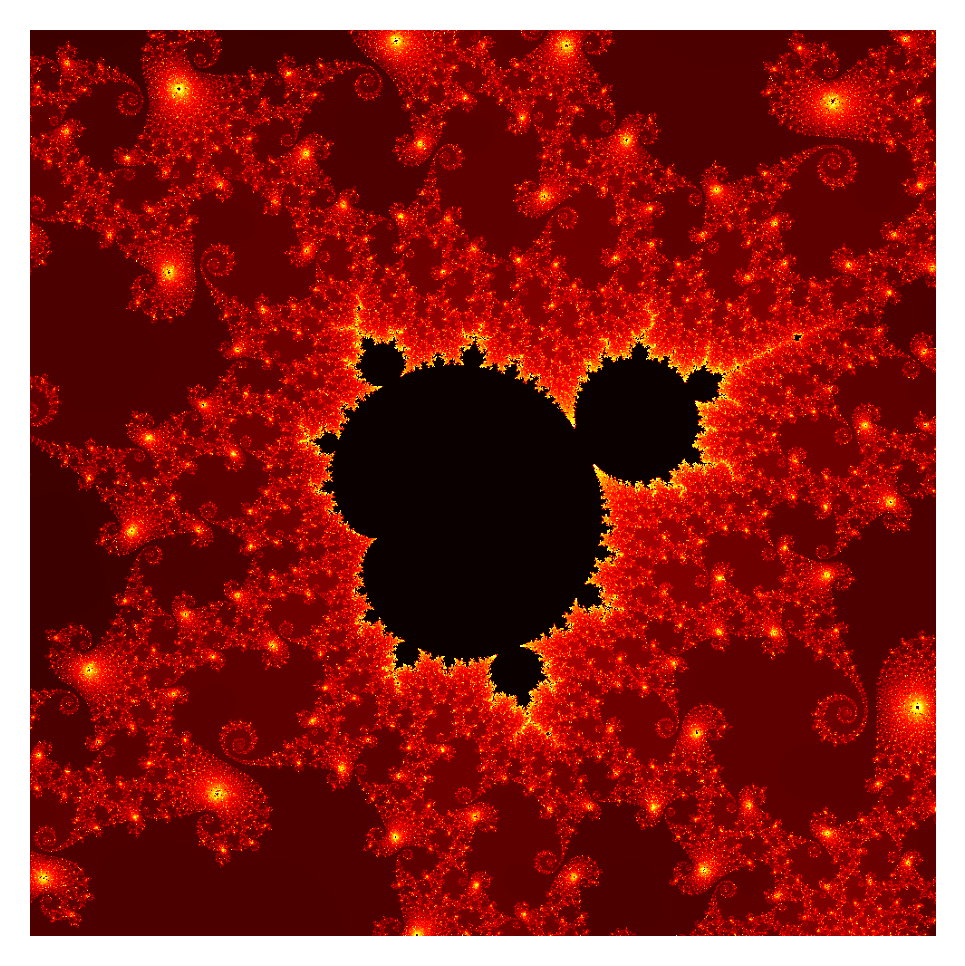

In [23]:
img = benchmark(mandelbrot_numba)
plt.subplots(dpi=300)
plt.imshow(img.T, cmap='hot', origin='lower')
plt.axis('off')
plt.show()

### Moving over to C++

To make things even faster, and to parallelize our problem, we want to move over to C++.

We can simply take our latest numba code, and "translate" it to C++.
```C++
#include <vector>

int mandelbrot_pixel(double cx, double cy, int maxiter)
{
    double x = cx;
    double y = cy;

    for (int n = 0; n < maxiter; n++) {
        double x2 = x * x;
        double y2 = y * y;

        if (x2 + y2 > 4.0) {
            return n;
        }

        y = 2 * x * y + cy;
        x = x2 - y2 + cx;
    }
    return 0;
}

std::vector<int> mandelbrot(double xmin, double xmax, double ymin, double ymax, int width, int height,
                int maxiter)
{
    std::vector<int> output(width * height);
    int i, j;
    double cx, cy;

    double dx = (xmax - xmin) / width;
    double dy = (ymax - ymin) / width;

    for (i = 0; i < width; i++) {
        for (j = 0; j < height; j++) {
            cx = xmin + i * dx;
            cy = ymin + j * dy;
            output[i * height + j] = mandelbrot_pixel(cx, cy, maxiter);
        }
    }
    return output;
}
```
Now we need to define our benchmark
```C++
void benchmark() {
    double xmin = -0.74877;
    double xmax = -0.74872;
    double ymin = 0.065053;
    double ymax = 0.065103;
    int width = 1000;
    int height = 1000;
    int maxiter = 2048;

    auto output = mandelbrot(xmin, xmax, ymin, ymax,
                     width, height, maxiter);

}
```

And then we define a main-function running our benchmark
```C++
int main() {
    benchmark();
    return 0
}
```

### Timing a C++ program

So far we have only used `%timeit` to do timing experiments. But our C++ program compiles to an executable, so how can we time it? We have a few different options. We can either look for a C++ tool or library that does timing experiments for us, most IDEs should have one for example, or we could use the built in `time` command-line tool, or lastly: we can run the executable from Jupyter, and time it that way.

We ignore the specific C++ tools for now. But the command-line tool `time` is useful to know about. When running a program in the command-line, if you write `time` before the actual name of the program, you get the time it takes to execute the program:
```
time ./mandelbrot
```
Gives
```
real    0m5.131s
user    0m5.111s
sys     0m0.006s
```
Here, `real` is the "real" time that has elapsed from we click go to the program ends up finishing. This is also known as "wall time", because it is the same time as a clock on the wall would take. The `user` is the time the program has spent in "user" mode. This means, the time the actual CPU of the computer has spent running the code. Finally, the `sys` is the amount of time the system call used outside our actual C++ code.

Using `time` gives only the time of a single execution. But what if we want to do multiple runs and average them, like we do for timeit? One possibility is simply running our benchmark many times inside our function:
```C++
int main() {
    for (int i=0; i<10; i++) {
        benchmark();
    }
    return 0
}
```
We can now use `time` to take the time of 10 executions of our benchmark, and divide by 10 to get the average. We could also build this into our main function.

An alternative is to use the standard Python library `os` (for operating system) to call our executable for oss. The benefit of this approach is that we can use `%timeit` like normal. Note that now `timeit` will also include the time it takes for `os` to call the code, so there is some overhead here. However, this likely won't make much for a difference unless we are timing things at the nanosecond range. For these measurements, this approach is solid.

```
os.system("c++ -std=c++14 mandelbrot.cpp -o mandelbrot")
%timeit -n 1 -r 2 os.system("./mandelbrot")
```

(Took about 5.2 seconds)

Our naive C++ solution is the same order of magnitude as our fastest numba solution, but slightly slower.


Before we move on to parallelizing our code. Let us first *compile it with optimization*. Much like we can turn of certain error checking in Cython, we can do the same with our C++ compiler. This is done using compiler flags.

Instead of picking compiler flags manually, we can compile with the flags `O1`, `O2` and `O3`, where the number gives the degree of optimization. Here, `O3`, should give the biggest speed up, but will also turn of most warnings and error handling. In the need for speed we are sacrificing some things, but using the flag `-O3` tells the compiler this is OK.

```
os.system("c++ -std=c++14 mandelbrot.cpp -o mandelbrot_optimized -O3")
%timeit os.system("./mandelbrot_optimized")
```


(Took about 2.81 s)

With `O3` compiling, our code runs in 2.81 seconds which is comparable to the numba solution.

With gcc at least, there is one more degree of optimization, called `-Ofast`. This does the exact same as `O3` but it also adds the flag `-ffast-math`. This flag makes floating point operations much faster, but it does so by switching around these operations in a way that can change their round-off errors. Using `-Ofast` might therefore produce a different outcome, which can sometimes be very important. Strictly speaking, `-Ofast` is not IEEE compliant, so beware.

With that said, let's try it!

```
os.system("c++ -std=c++14 mandelbrot.cpp -o mandelbrot_optimized -Ofast")
%timeit os.system("./mandelbrot_optimized")
```

(Took about 2.79 s)

In this case, `Ofast` did not improve much on the `O3` optimized solution much.

### Parallelizing with OpenMP

We are now ready to make our C++ code parallel. Luckily, rendering the Mandelbrot set is a process that is *highly parallelizable*, because each pixel in the image is independent of each other. So different cores can render the different pixels.

To parallelize our code, we will use `OpenMP`, which can automatically decide how to split up the problem and how many cores to use. To add OpenMP to our code, we need to tell the compiler where to try to parallelize the code. This would be in the for-loop over the pixels.

We can use a *compiler-directive* to give information to the compiler, this is done with the keyword `#pragma`.

Above the loop over the pixels, we add our OpenMP directive:
```C++
#pragma omp parallel for
for (i = 0; i < width; i++) {
    for (j = 0; j < height; j++) {
        cx = xmin + i * dx;
        cy = ymin + j * dy;
        output[i * height + j] = mandelbrot_pixel(cx, cy, maxiter);
    }
}
```
This tells the compiler to try to use OpenMP to parallelize our for loop.

When compiling with OpenMP, we also need to add the flag `-fopenmp`


```
os.system("c++ -std=c++14 mandelbrot_parallel.cpp -o mandelbrot_parallel -O3 -fopenmp")
%timeit os.system("./mandelbrot_parallel")
```
(This took 264 ms)

So with OpenMP, our code has gone from 2.79 seconds to 264 ms seconds, a speed-up of about about 10. We can get more information about the CPU usage with the `time` command:


```
time ./mandelbrot_parallel

real    0m0.247s
user    0m3.307s
sys     0m0.025s
```

Here the interesting thing is that the "real" time is 0.247 seconds, which is the time we need to wait for the program to finish running, but the "user" time is about 3.307 seconds. Here the "user" time is the time used by a CPU. How can the time used by the CPU be more than the time we wait? This is because there are multiple CPU's running simultaneously, and both are racking up "user" time.

We can use the different program `/usr/bin/time -v` to get more information out
```
/usr/bin/time -v ./mandelbrot_parallel
    Command being timed: "./mandelbrot_parallel"
	User time (seconds): 3.30
	System time (seconds): 0.00
	Percent of CPU this job got: 1379%
	Elapsed (wall clock) time (h:mm:ss or m:ss): 0:00.24
    ...
```
On Mac you can use the command `gtime` instead after installing `gnu-time` through brew (`brew install gnu-time`).
We have removed the next 10 or so lines because they are uninteresting. In this execution we see the job used 1379% of the computers CPU, meaning it used about 14 cores.



#### Parallelizing the outer loops

You might wonder why we tell OpenMP to parallelize the outer loop (the `i`-loop), and not the inner loop instead, or in addition. The reason is that we want the code to spend as little time as possible on the actual branching and merging of threads, because this adds overhead. To minimize overhead we therefore ideally want to parallelize at the highest level possible. In this case, it is much better to parallelize the `i`-loop, because then each thread will take parts of this loop, and create their own `j`-loops. If we instead parallelized the `j`-loops, then threads would need to be created and merged for each iteration of the `i`-loop.

The important point being: The higher the level we parallelize at, the better it will be.

### Create a python bindings using cppyy


When learning about mixed programming we also learned that we can create bindings between python and C++ using `cppyy`, and that once you have the C++ code in place it is fairly simple to write the binding. In this case we could write something like

In [24]:
import cppyy

cppyy.include("vector")
cppyy.cppdef("""
int mandelbrot_pixel(double cx, double cy, int maxiter)
{
    double x = cx;
    double y = cy;

    for (int n = 0; n < maxiter; n++) {
        double x2 = x * x;
        double y2 = y * y;

        if (x2 + y2 > 4.0) {
            return n;
        }

        y = 2 * x * y + cy;
        x = x2 - y2 + cx;
    }
    return 0;
}

std::vector<int> mandelbrot(double xmin, double xmax, double ymin, double ymax, int width, int height,
                int maxiter)
{
    std::vector<int> output(width * height);
    int i, j;
    double cx, cy;

    double dx = (xmax - xmin) / width;
    double dy = (ymax - ymin) / width;

    for (i = 0; i < width; i++) {
        for (j = 0; j < height; j++) {
            cx = xmin + i * dx;
            cy = ymin + j * dy;
            output[i * height + j] = mandelbrot_pixel(cx, cy, maxiter);
        }
    }
    return output;
}
""")

True

Note that the mandelbrot function returns a vector and `cppyy` will automatically convert this to a python list. We thus need to convert this list in to a numpy array and reshape it to have the correct shape. We do this by wrapping the method coming from `cppyy` into another function.

In [25]:
from cppyy.gbl import mandelbrot as _mandelbrot_cppyy

In [26]:
def mandelbrot_cppyy(xmin, xmax, ymin, ymax, width, height, maxiter):
    output = _mandelbrot_cppyy(xmin, xmax, ymin, ymax, width, height, maxiter)
    return np.array(output).reshape((width, height))

When using `cppyy` is is also easy to verify that the implementation of the mandelbrot function is correct by plotting it with matplotlib.

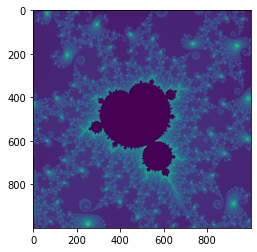

In [27]:
img = benchmark(mandelbrot_cppyy)
plt.imshow(img)

```
%timeit benchmark(mandelbrot_cppyy)
```
(This took about 3 seconds which is similar to the naive C++ implementation)

And we see that it is more or less identical to the first version in C++ which is what we expect. If you think this was a bit tricky, no worries. This example was meant to show that it is indeed possible, but there is a cost to be payed in terms of code complexity


### Parallelizing with numba

Numba and Cython can also use OpenMP to parallelize their JIT compiled code. To do so for a for-loop, you can use the function `prange` (for "parallel range"). We also need to set the keyword `parallel` in `jit` to `True`. Let us try this with our fastest numba code:

In [28]:
import numpy as np
import numba

@numba.jit
def mandelbrot_pixel_numba(cx, cy, maxiter):
    x = cx
    y = cy
    for n in range(maxiter):
        x2 = x*x
        y2 = y*y
        if x2 + y2 > 4.0:
            return n
        y = 2*x*y + cy
        x = x2 - y2 + cx
    return 0


@numba.jit(parallel=True)
def mandelbrot_parallel_numba(xmin, xmax, ymin, ymax, width, height, maxiter):
    x = np.linspace(xmin, xmax, width)
    y = np.linspace(ymin, ymax, height)
    img = np.empty((width, height))

    for i in numba.prange(width):
        for j in range(height):
            img[i, j] = mandelbrot_pixel_numba(x[i], y[j], maxiter)
    return img

```
%timeit benchmark(mandelbrot_parallel_numba)
```

(This took 230 ms)

As with the C++ code, it makes more sense to parallelize the `i` loop with `prange` than the `j`-loop.


### Bar

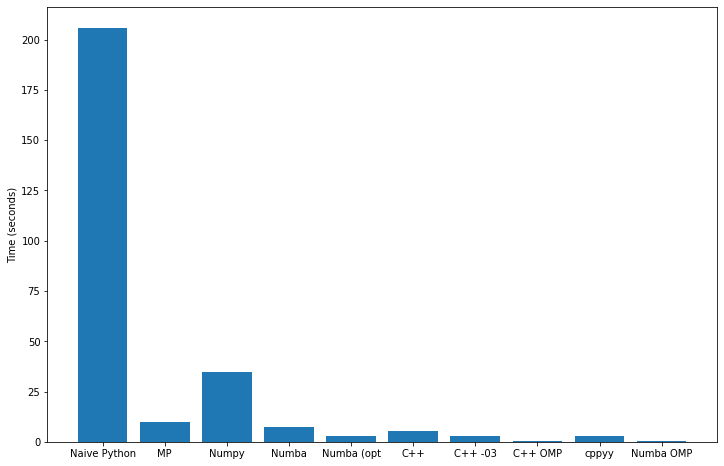

In [29]:
times = {
    "Naive Python": 206,
    "MP": 9.7,
    "Numpy": 34.5,
    "Numba": 7.34,
    "Numba (opt": 2.91,
    "C++": 5.2,
    "C++ -03": 2.81,
    "C++ OMP": 0.264,
    "cppyy": 3.0,
    "Numba OMP": 0.230,
}

fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(times.keys(), times.values())
ax.set_ylabel('Time (seconds)')
plt.show()

Or replotted with logarithmic axis:

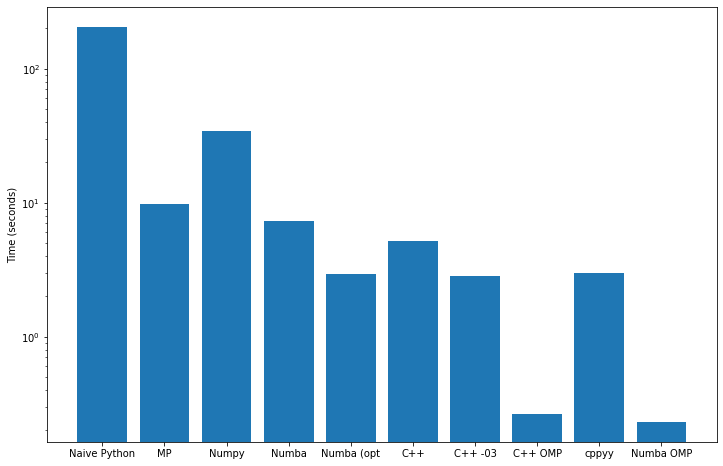

In [30]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(times.keys(), times.values(), log=True)
ax.set_ylabel('Time (seconds)')
plt.show()

## GPU Parallelization

We started this lecture with talking about CPU's, and how the end of frequency scaling lead to a paradigm shift leading to multi-core processors. However, even long before this paradigm shift, there was another component of the computer already running things in parallel: the GPU.

GPU stands for "graphics processing unit", and this is a component that, like the CPU, is good at crunching numbers and computing things. Unlike the CPU, it is specialized to dealing with computing graphics to be shown on the screen. Because it is specialized, we cannot talk about GPU "cores" in the same way as CPU's, but GPU's have been specialized to parallelize their tasks since the beginning. This is because GPU's work on making the graphics to be shown on the screen, and computing the pixels to show on the screen is a very parallel problem. Because we also need sufficient *frames per second* to be computed in real time, we need to be able to parallelize our code sufficiently so that it runs fast enough to create smooth graphics.

While writing code that can be split among the 4 or 8 cores of a normal CPU can give us a speed-up of at most 4, or 8, on a GPU there are usually thousands of threads that can be run in parallel. The real speed-up of parallelization is therefore achieved on GPU's (or supercomputers with many, many CPU's).

However, writing parallel code on GPU's is especially challenging, because it is such a specialized piece of hardware. Only certain problems are therefore well suited to being run on GPU's. While graphics computing and rendering animations is a natural example (because that's what GPUs are made for in the first place), in scientific computing, especially solving PDE's and machine learning are good use cases.

Our Mandelbrot example is also a well suited problem for a GPU to tackle. If you are curious how this can be done, the blog post we referenced shows a few different ways to go about doing this, including one using numba. Using these techniques, they mange to get the computation down to sub 20 milliseconds. That's quite the speed up from the original 3+ minutes!